For rendering environment, we can use pyvirtualdisplay.

In [1]:
!pip3 install pyvirtualdisplay
!pip3 install piglet

To activate virtual display we need to run a script once for training an agent, as follows:

In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [3]:
# This code creates a virtual display to draw game images on. 
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [4]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

To be able to use OpenAI Gym, we need a Python version > 3.5.

In [5]:
!python --version

Python 3.6.9


In [5]:
!pip3 install gym

List the available environments.

In [6]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

Imports

In [7]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

## Algorithmic

In [9]:
env = gym.make('Copy-v0')
env.reset()
env.render()
env.close()

Total length of input instance: 4, step: 0
Observation Tape    :   CCEC  
Output Tape         :   
Targets             :   CCEC  








## Atari

In [10]:
!pip3 install gym[atari]

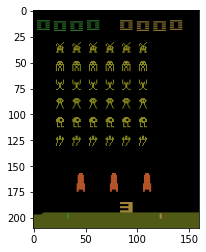

In [11]:
env = gym.make('SpaceInvaders-v0')
env.reset()
plt.imshow(env.render('rgb_array'))
env.close()

## Box2d

In [12]:
!pip3 install gym[box2d]

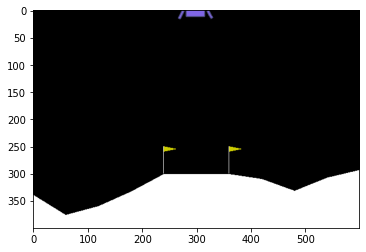

In [13]:
env = gym.make('LunarLander-v2')
env.reset()
plt.imshow(env.render('rgb_array'))
env.close()

## CartPole

In [14]:
!pip3 install gym[classic_control]

In [12]:
env = gym.make('CartPole-v0')
env = wrap_env(env)

print('observation space:', env.observation_space)
print(env.observation_space.high)
print(env.observation_space.high)
print('action space:', env.action_space)

ob = env.reset()
print('initial observation:', obs)

action = env.action_space.sample()  # take a random action

obs, reward, done, info = env.step(action)
print('next observation:', obs)
print('reward:', reward)
print('done:', done)
print('info:', info)

env.close()

observation space: Box(4,)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
action space: Discrete(2)
initial observation: [ 0.04795686 -0.00163013 -0.02011721  0.02176071]
next observation: [ 0.04792426 -0.19645789 -0.01968199  0.30802916]
reward: 1.0
done: False
info: {}


In [15]:
'''CartPole problem use random action'''
env = gym.make('CartPole-v0')
env = wrap_env(env)

for i_episode in range(10):
  ob = env.reset()
  t = 0
  while True:
    t += 1
    env.render()
    # agent goes here
    action = env.action_space.sample()   # take a random action
    obs, reward, done, info = env.step(action) 
    if done:
      print("Episode {} finished after {} timesteps".format(i_episode+1, t+1))
      print('reward:', reward)
      break
            
env.close()
show_video()

Episode 1 finished after 32 timesteps
reward: 1.0
Episode 2 finished after 28 timesteps
reward: 1.0
Episode 3 finished after 27 timesteps
reward: 1.0
Episode 4 finished after 11 timesteps
reward: 1.0
Episode 5 finished after 32 timesteps
reward: 1.0
Episode 6 finished after 21 timesteps
reward: 1.0
Episode 7 finished after 18 timesteps
reward: 1.0
Episode 8 finished after 47 timesteps
reward: 1.0
Episode 9 finished after 23 timesteps
reward: 1.0
Episode 10 finished after 17 timesteps
reward: 1.0


## MountainCar

In [20]:
'''MountainCar problem use random action'''
env = gym.make("MountainCar-v0")
env = wrap_env(env)

# explore MountainCar environment
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)
actions = {'left': 0, 'stop': 1, 'right': 2}

# simple heuristic policy
def policy(t):
    if t > 50 and t < 100:
        return actions['left']
    else:
        return actions['right']


for i_episode in range(10):
  # In MountainCar, observation is just two numbers: 
  # car position and velocity
  ob = env.reset()
  t = 0
  while True:
    t += 1
    env.render()
    # agent goes here
    # action = env.action_space.sample()   # take a random action
    # action = actions['right']   # take a fixed action
    action = policy(t)
    observation, reward, done, info = env.step(action) 
    if done:
      print("Episode {} finished after {} timesteps".format(i_episode+1, t+1))
      print('reward:', reward)
      break
            
env.close()
show_video()

Observation space: Box(2,)
Action space: Discrete(3)
Episode 1 finished after 141 timesteps
reward: -1.0
Episode 2 finished after 136 timesteps
reward: -1.0
Episode 3 finished after 134 timesteps
reward: -1.0
Episode 4 finished after 134 timesteps
reward: -1.0
Episode 5 finished after 137 timesteps
reward: -1.0
Episode 6 finished after 133 timesteps
reward: -1.0
Episode 7 finished after 134 timesteps
reward: -1.0
Episode 8 finished after 133 timesteps
reward: -1.0
Episode 9 finished after 137 timesteps
reward: -1.0
Episode 10 finished after 139 timesteps
reward: -1.0


# Implement Agents

Code from OpenAI Gym Github.

### Random agent

In [ ]:
import argparse
import sys

import gym
from gym import wrappers, logger

class RandomAgent(object):
    """The world's simplest agent!"""
    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
        return self.action_space.sample()

if __name__ == '__main__':
    parser = argparse.ArgumentParser(description=None)
    parser.add_argument('env_id', nargs='?', default='CartPole-v0', help='Select the environment to run')
    args = parser.parse_args()

    # You can set the level to logger.DEBUG or logger.WARN if you
    # want to change the amount of output.
    logger.set_level(logger.INFO)

    env = gym.make(args.env_id)

    # You provide the directory to write to (can be an existing
    # directory, including one with existing data -- all monitor files
    # will be namespaced). You can also dump to a tempdir if you'd
    # like: tempfile.mkdtemp().
    outdir = '/tmp/random-agent-results'
    env = wrappers.Monitor(env, directory=outdir, force=True)
    env.seed(0)
    agent = RandomAgent(env.action_space)

    episode_count = 100
    reward = 0
    done = False

    for i in range(episode_count):
        ob = env.reset()
        while True:
            action = agent.act(ob, reward, done)
            ob, reward, done, _ = env.step(action)
            if done:
                break
            # Note there's no env.render() here. But the environment still can open window and
            # render if asked by env.monitor: it calls env.render('rgb_array') to record video.
            # Video is not recorded every episode, see capped_cubic_video_schedule for details.

    # Close the env and write monitor result info to disk
    env.close()

### Cross-entropy Method agent

In [ ]:
import gym
from gym import wrappers, logger
import numpy as np
import pickle
import json, sys, os
from os import path
from _policies import BinaryActionLinearPolicy # Different file so it can be unpickled
import argparse

def cem(f, th_mean, batch_size, n_iter, elite_frac, initial_std=1.0):
    """
    Generic implementation of the cross-entropy method for maximizing a black-box function
    Args:
        f: a function mapping from vector -> scalar
        th_mean (np.array): initial mean over input distribution
        batch_size (int): number of samples of theta to evaluate per batch
        n_iter (int): number of batches
        elite_frac (float): each batch, select this fraction of the top-performing samples
        initial_std (float): initial standard deviation over parameter vectors
    returns:
        A generator of dicts. Subsequent dicts correspond to iterations of CEM algorithm.
        The dicts contain the following values:
        'ys' :  numpy array with values of function evaluated at current population
        'ys_mean': mean value of function over current population
        'theta_mean': mean value of the parameter vector over current population
    """
    n_elite = int(np.round(batch_size*elite_frac))
    th_std = np.ones_like(th_mean) * initial_std

    for _ in range(n_iter):
        ths = np.array([th_mean + dth for dth in  th_std[None,:]*np.random.randn(batch_size, th_mean.size)])
        ys = np.array([f(th) for th in ths])
        elite_inds = ys.argsort()[::-1][:n_elite]
        elite_ths = ths[elite_inds]
        th_mean = elite_ths.mean(axis=0)
        th_std = elite_ths.std(axis=0)
        yield {'ys' : ys, 'theta_mean' : th_mean, 'y_mean' : ys.mean()}

def do_rollout(agent, env, num_steps, render=False):
    total_rew = 0
    ob = env.reset()
    for t in range(num_steps):
        a = agent.act(ob)
        (ob, reward, done, _info) = env.step(a)
        total_rew += reward
        if render and t%3==0: env.render()
        if done: break
    return total_rew, t+1

if __name__ == '__main__':
    logger.set_level(logger.INFO)

    parser = argparse.ArgumentParser()
    parser.add_argument('--display', action='store_true')
    parser.add_argument('target', nargs="?", default="CartPole-v0")
    args = parser.parse_args()

    env = gym.make(args.target)
    env.seed(0)
    np.random.seed(0)
    params = dict(n_iter=10, batch_size=25, elite_frac=0.2)
    num_steps = 200

    # You provide the directory to write to (can be an existing
    # directory, but can't contain previous monitor results. You can
    # also dump to a tempdir if you'd like: tempfile.mkdtemp().
    outdir = '/tmp/cem-agent-results'
    env = wrappers.Monitor(env, outdir, force=True)

    # Prepare snapshotting
    # ----------------------------------------
    def writefile(fname, s):
        with open(path.join(outdir, fname), 'w') as fh: fh.write(s)
    info = {}
    info['params'] = params
    info['argv'] = sys.argv
    info['env_id'] = env.spec.id
    # ------------------------------------------

    def noisy_evaluation(theta):
        agent = BinaryActionLinearPolicy(theta)
        rew, T = do_rollout(agent, env, num_steps)
        return rew

    # Train the agent, and snapshot each stage
    for (i, iterdata) in enumerate(
        cem(noisy_evaluation, np.zeros(env.observation_space.shape[0]+1), **params)):
        print('Iteration %2i. Episode mean reward: %7.3f'%(i, iterdata['y_mean']))
        agent = BinaryActionLinearPolicy(iterdata['theta_mean'])
        if args.display: do_rollout(agent, env, 200, render=True)
        writefile('agent-%.4i.pkl'%i, str(pickle.dumps(agent, -1)))

    # Write out the env at the end so we store the parameters of this
    # environment.
    writefile('info.json', json.dumps(info))

    env.close()

## Mean-Reversion

Create a new environment.

In [23]:
!pip3 install gym-mr

ERROR: Could not find a version that satisfies the requirement gym-mr (from versions: none)
ERROR: No matching distribution found for gym-mr


In [ ]:
gym.make('gym_mr:mr-v0')